In [505]:
#Importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
import statsmodels.api as sm
from datetime import datetime, timedelta

In [41]:
start_date = '2012-01-01'
end_date = '2023-05-01'
start = '2012-12-30'
end = '2023-01-01'

### Importing factor data

In [42]:
#importing individual data for each factor

file_path = 'data/Nifty50TRI.csv'

df_nifty = pd.read_csv(file_path, index_col=0, parse_dates=True).sort_index()
df_nifty.rename(columns={df_nifty.columns[0]: 'Nifty'}, inplace=True)
df_nifty


,Nifty
Date,
2000-01-03,1688.44
2000-01-04,1737.75
2000-01-05,1692.25
2000-01-06,1715.37
2000-01-07,1710.81
...,...
2023-08-28,28320.40
2023-08-29,28374.03
2023-08-30,28381.13


<Axes: xlabel='DATE'>

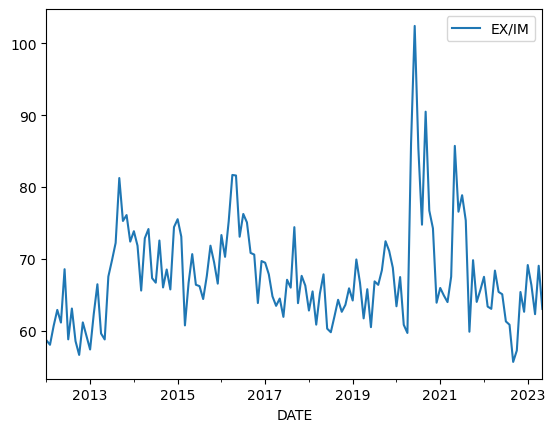

In [103]:
# The ratio of exports to imports
df_trade = pd.read_csv('exportstoimports.csv',index_col=0, parse_dates=True).sort_index()
df_trade.rename(columns={df_trade.columns[0]: 'EX/IM'}, inplace=True)
df_trade[start_date:end_date].plot()


<Axes: xlabel='DATE'>

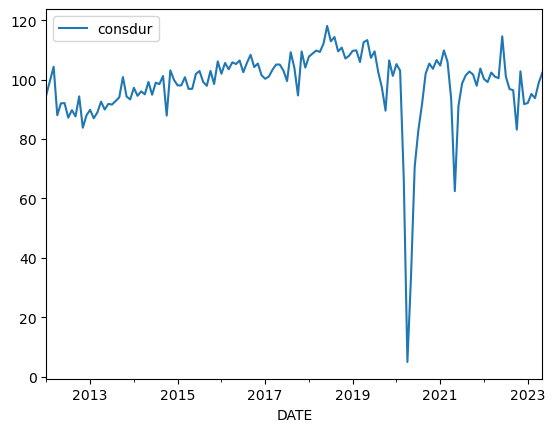

In [44]:
# Production(manufacture) of consumer durables
df_consdur = pd.read_csv('consdur.csv',index_col=0, parse_dates=True).sort_index()
df_consdur.rename(columns={df_consdur.columns[0]: 'consdur'}, inplace=True)
df_consdur[start_date:end_date].plot()

In [45]:
# Consumer Price Index
df_cpi = pd.read_csv('cpi.csv',index_col=0, parse_dates=True).sort_index()
df_cpi.rename(columns={df_cpi.columns[0]: 'cpi'}, inplace=True)
df_cpi.tail()

,cpi
DATE,
2023-02-01,146.203555
2023-03-01,146.864611
2023-04-01,147.856195
2023-05-01,148.407075
2023-06-01,150.280067


In [46]:
# Whole Sale Price Index
df_wpi = pd.read_csv('wpi.csv', index_col=0, parse_dates=True).sort_index()
df_wpi.rename(columns={df_wpi.columns[0]: 'wpi'}, inplace=True)
df_wpi.tail()

,wpi
DATE,
2022-08-01,138.841477
2022-09-01,137.663318
2022-10-01,138.569594
2022-11-01,138.207084
2022-12-01,136.303905


In [47]:
# GDP to trend ratio
df_gdptotrend = pd.read_csv('gdptotrend.csv',index_col=0, parse_dates=True).sort_index()
df_gdptotrend.rename(columns={df_gdptotrend.columns[0]: 'gdptotrend'}, inplace=True)
df_gdptotrend.tail()

,gdptotrend
DATE,
2022-10-01,100.065379
2022-11-01,100.254566
2022-12-01,100.452557
2023-01-01,100.657802
2023-02-01,100.868165


<Axes: xlabel='DATE'>

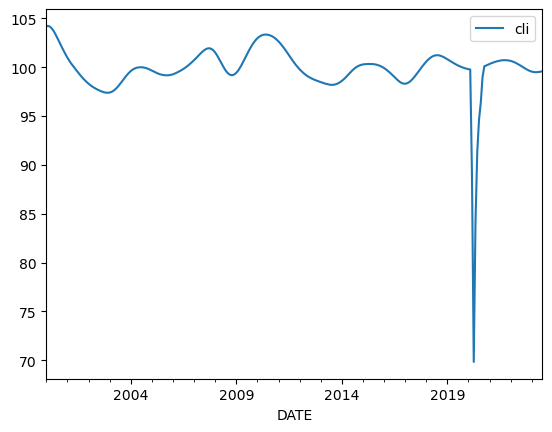

In [48]:
# Composite lending indicator, from OCED
df_cli = pd.read_csv('cli.csv', index_col=0, parse_dates = True).sort_index().dropna()
df_cli.rename(columns={df_cli.columns[0]: 'cli'}, inplace=True)
df_cli.plot()

In [49]:
# Monthly data on car sales
df_carsales = pd.read_excel('carsales.xlsx', index_col=0, parse_dates = True).sort_index()
df_carsales.rename(columns={df_carsales.columns[0]: 'car'}, inplace=True)
#df_carsales['car'] = pd.to_numeric(df_carsales['car'], errors='coerce').pad()
df_carsales.tail()

,car
observation_date,
2023-03-01,101.650917
2023-04-01,101.893274
2023-05-01,102.143492
2023-06-01,102.399609
2023-07-01,102.660440


<Axes: xlabel='DATE'>

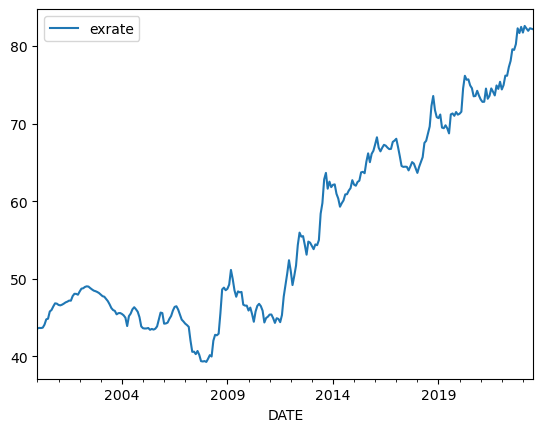

In [50]:
# Exchange rate percentage changes MoM
df_exrate = pd.read_csv('exrate.csv', index_col=0, parse_dates = True)
df_exrate.rename(columns={df_exrate.columns[0]: 'exrate'}, inplace=True)
df_exrate.plot()

In [51]:
# 10 year bond rate (abbreviated as lt for long term)
df_ltrate = pd.read_csv('ltrate.csv', index_col=0, parse_dates = True)
df_ltrate.rename(columns={df_ltrate.columns[0]: 'ltrate'}, inplace=True)
df_ltrate.tail()

,ltrate
DATE,
2023-02-01,7.34
2023-03-01,7.36
2023-04-01,7.18
2023-05-01,7.01
2023-06-01,7.05


In [52]:
# Real effective exchange rate, percentage changes MoM
df_reer = pd.read_csv('reer.csv', index_col=0, parse_dates = True)
df_reer.rename(columns={df_reer.columns[0]: 'reer'}, inplace=True)
df_reer.tail()

,reer
DATE,
2023-03-01,96.76
2023-04-01,96.72
2023-05-01,97.47
2023-06-01,99.22
2023-07-01,101.48


In [53]:
# 3 month t-bill rate (abbreviated as st for short term)
df_strate = pd.read_csv('strate.csv', index_col=0, parse_dates = True)
df_strate.rename(columns={df_strate.columns[0]: 'strate'}, inplace=True)
df_strate.tail()

,strate
DATE,
2023-02-01,6.70
2023-03-01,6.88
2023-04-01,6.81
2023-05-01,6.87
2023-06-01,6.76


In [54]:
#df_ltrate = df_ltrate.reindex(df_strate.index, fill_value=0)
df_ratediff = pd.DataFrame()
df_ratediff['ratediff'] = df_ltrate['ltrate'] - df_strate['strate']
df_ratediff.tail()

,ratediff
DATE,
2023-02-01,0.64
2023-03-01,0.48
2023-04-01,0.37
2023-05-01,0.14
2023-06-01,0.29


<Axes: xlabel='DATE'>

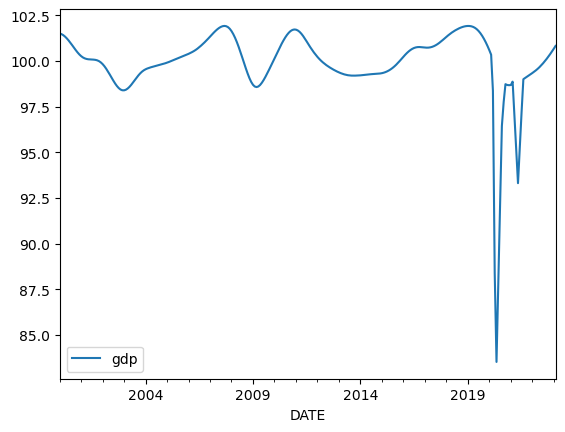

In [55]:
# Normalized GDP rate of change, MoM (Source: OECD)
df_gdp = pd.read_csv('gdp.csv', index_col=0, parse_dates = True)
df_gdp.rename(columns={df_gdp.columns[0]: 'gdp'}, inplace=True)
df_gdp.plot()

<Axes: xlabel='DATE'>

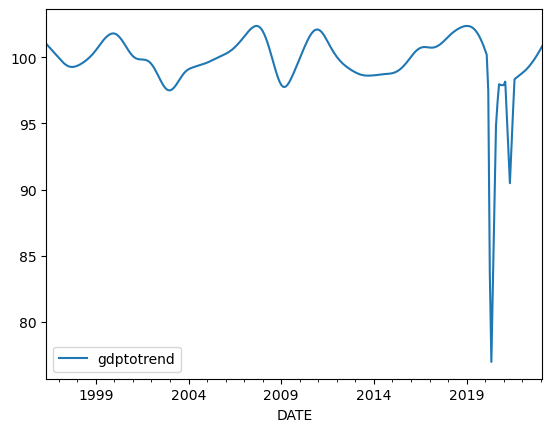

In [56]:
# GDP to trend ratio
df_gdptotrend = pd.read_csv('gdptotrend.csv', index_col=0, parse_dates = True)
df_gdptotrend.rename(columns={df_gdptotrend.columns[0]: 'gdptotrend'}, inplace=True)
df_gdptotrend.plot()

<Axes: xlabel='DATE'>

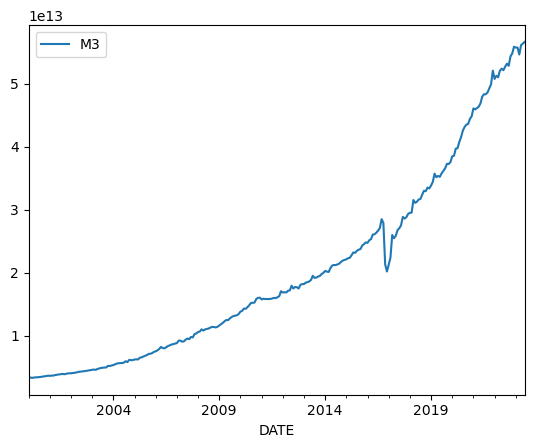

In [96]:
# Monetary Aggregates(M3)
df_moneysupply = pd.read_csv('moneysupply.csv', index_col=0, parse_dates = True)
df_moneysupply.rename(columns={df_moneysupply.columns[0]: 'M3'}, inplace=True)
df_moneysupply.plot()

<Axes: xlabel='Date'>

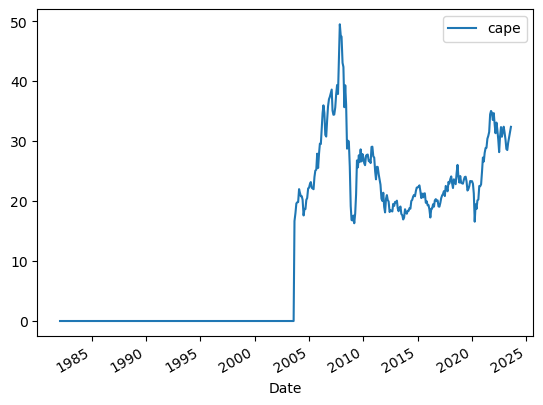

In [58]:
# CAPE Ratio of Nifty 50
df_cape = pd.read_csv('Historic-cape-ratios.csv', index_col=0, parse_dates = True)
df_cape = df_cape.iloc[:,[1]]
df_cape.rename(columns={df_cape.columns[0]: 'cape'}, inplace=True)
df_cape.plot()


In [59]:
# Relative valuation metrics of Nifty 50
df_rel_val = pd.read_csv('valuation.csv', index_col=0, parse_dates = True).sort_index()
df_rel_val

,P/E,P/B,Div Yield %
Date,,,
2000-01-03,25.91,4.63,0.95
2000-01-04,26.67,4.76,0.92
2000-01-05,25.97,4.64,0.95
2000-01-06,26.32,4.70,0.94
2000-01-07,26.25,4.69,0.94
...,...,...,...
2023-08-28,22.03,4.43,1.38
2023-08-29,22.07,4.42,1.38
2023-08-30,22.07,4.42,1.38


<Axes: xlabel='Date'>

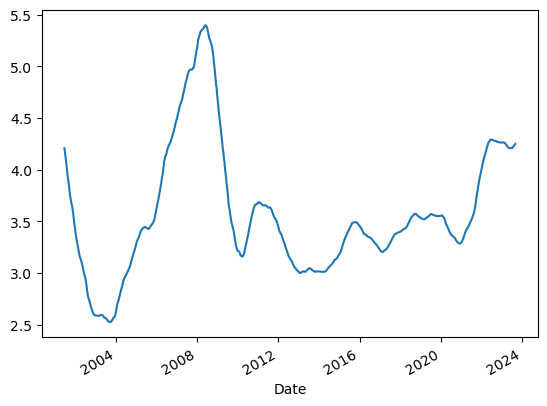

In [60]:
# Calculating the 5 year mean of PE and the PE premium at each day compared to the 5 yr average
df_rel_val['P/E_5yr_mean'] = df_rel_val['P/E'].rolling(window=1250).mean()
df_rel_val['P/E_check'] = df_rel_val['P/E'] - df_rel_val['P/E_5yr_mean']
df_rel_val['P/B'].rolling(365).mean().plot()

<Axes: xlabel='DATE'>

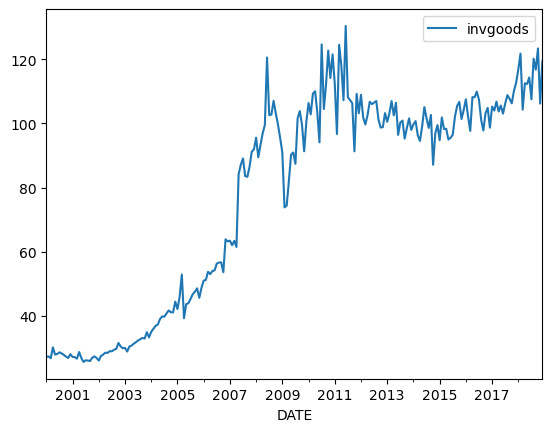

In [61]:
## Manufacture of investment goods data
df_invgoods = pd.read_csv('invgoods.csv', index_col=0, parse_dates = True).sort_index()
df_invgoods.rename(columns={df_invgoods.columns[0]: 'invgoods'}, inplace=True)
df_invgoods.plot()

In [62]:
# Net FPI flows into equity monthly
df_fpiflows = pd.read_excel('FPIflows.xlsx', index_col=0, parse_dates=True).sort_index()
df_fpiflows.rename(columns={df_fpiflows.columns[0]: 'fpiflows'}, inplace=True)
df_fpiflows.tail()

,fpiflows
Month,
2023-05-01,43838
2023-06-01,47148
2023-07-01,46618
2023-08-01,12262
2023-09-01,3037


<Axes: xlabel='Date\xa0'>

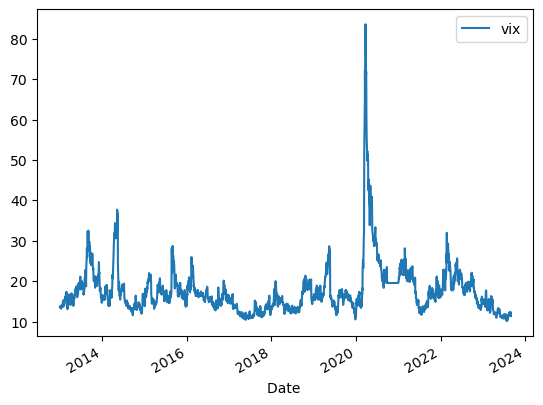

In [63]:
# India VIX Data
df_vix = pd.read_excel('VIX.xlsx', index_col=0, parse_dates=True).sort_index()
df_vix.rename(columns={df_vix.columns[0]: 'vix'}, inplace=True)
df_vix.plot()

In [64]:
# US 3m tbill rate
df_US3mrate = pd.read_csv('US3mrate.csv', index_col=0, parse_dates=True)
df_US3mrate.rename(columns={df_US3mrate.columns[0]: 'US3m'}, inplace=True)
df_US3mrate['US3m'] = pd.to_numeric(df_US3mrate['US3m'], errors='coerce')
df_US3mrate

,US3m
DATE,
2010-01-01,0.06
2010-02-01,0.11
2010-03-01,0.15
2010-04-01,0.16
2010-05-01,0.16
...,...
2023-04-01,4.92
2023-05-01,5.14
2023-06-01,5.16


In [65]:
# China 3m tbill rate
df_China3mrate = pd.read_excel('China3mrate.xlsx', index_col=0, parse_dates=True)
df_China3mrate.rename(columns={df_China3mrate.columns[0]: 'China3m'}, inplace=True)
df_China3mrate

,China3m
DATE,
2010-01-01,1.85
2010-02-01,1.94
2010-03-01,1.91
2010-04-01,1.73
2010-05-01,2.02
...,...
2023-02-01,2.94
2023-03-01,3.05
2023-04-01,2.89


In [66]:
df_USvsChina_rate = pd.DataFrame()
df_USvsChina_rate['USvsChina3m'] = (df_US3mrate['US3m'] - df_China3mrate['China3m'])
df_USvsChina_rate.tail()

,USvsChina3m
DATE,
2023-04-01,2.03
2023-05-01,2.16
2023-06-01,2.35
2023-07-01,NaN
2023-08-01,NaN


In [67]:
df_nifty

,Nifty
Date,
2000-01-03,1688.44
2000-01-04,1737.75
2000-01-05,1692.25
2000-01-06,1715.37
2000-01-07,1710.81
...,...
2023-08-28,28320.40
2023-08-29,28374.03
2023-08-30,28381.13


### Changing parameter forms and resampling to daily

In [204]:
start_date = '2012-01-01'
end_date = '2023-05-01'
start = '2012-12-31'
end = '2023-01-01'
    

In [289]:
date_range = pd.date_range(start=start_date, end=end_date)
df_nifty_daily = pd.DataFrame(index=date_range)
#df_nifty_daily = df_nifty_daily.reindex(df_nifty.index)
df_nifty_daily['Nifty'] = df_nifty['Nifty']
df_nifty_daily['Nifty'] = df_nifty_daily['Nifty'].ffill()
df_nifty_daily['Nifty'] = df_nifty_daily['Nifty'].bfill()
df_nifty_daily = df_nifty_daily[start_date:end_date]
df_nifty_daily.isnull().sum()
df_ret = df_nifty_daily.pct_change().dropna()
df_nifty_daily

,Nifty
2012-01-01,5881.28
2012-01-02,5881.28
2012-01-03,6044.28
2012-01-04,6024.43
2012-01-05,6024.82
...,...
2023-04-27,26078.38
2023-04-28,26302.92
2023-04-29,26302.92
2023-04-30,26302.92


In [71]:
%who DataFrame

Nifty_Weekly	 df_China3mrate	 df_US3mrate	 df_USvsChina_rate	 df_cape	 df_carsales	 df_cli	 df_consdur	 df_cpi	 
df_exrate	 df_fpiflows	 df_gdp	 df_gdptotrend	 df_invgoods	 df_ltrate	 df_moneysupply	 df_nifty	 df_ratediff	 
df_reer	 df_rel_val	 df_strate	 df_trade	 df_vix	 df_wpi	 


In [104]:
df_trade = df_trade[start_date: end_date]
df_cape = df_cape[start_date: end_date]
df_carsales = df_carsales[start_date: end_date]
df_cli = df_cli[start_date: end_date]
df_consdur = df_consdur[start_date : end_date]
df_cpi = df_cpi[start_date : end_date]
df_exrate = df_exrate[start_date : end_date]
df_fpiflows = df_fpiflows[start_date : end_date]
df_gdp = df_gdp[start_date : end_date]
df_gdptotrend = df_gdptotrend[start_date : end_date]
df_invgoods = df_invgoods[start_date : end_date]
df_ltrate = df_ltrate[start_date : end_date]
df_moneysupply = df_moneysupply[start_date : end_date]
df_reer = df_reer[start_date : end_date]
df_rel_val = df_rel_val[start_date : end_date]
df_strate = df_strate[start_date : end_date]
df_vix = df_vix[start_date : end_date]
df_USvsChina_rate = df_USvsChina_rate[start_date : end_date]
df_wpi = df_wpi[start_date : end_date]

<Axes: xlabel='DATE'>

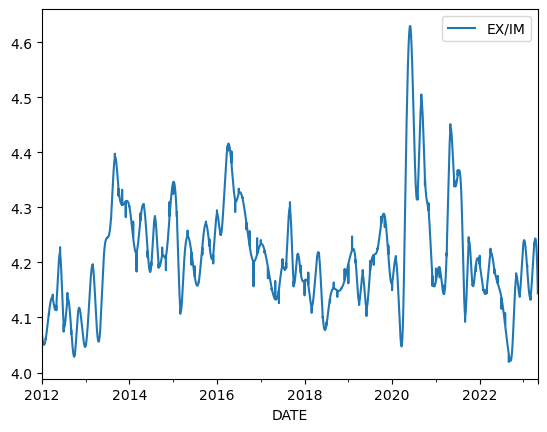

In [112]:

df_trade_d = np.log(df_trade.resample('D').interpolate(method='spline', order=3))
df_trade_d.plot()

<Axes: xlabel='Date'>

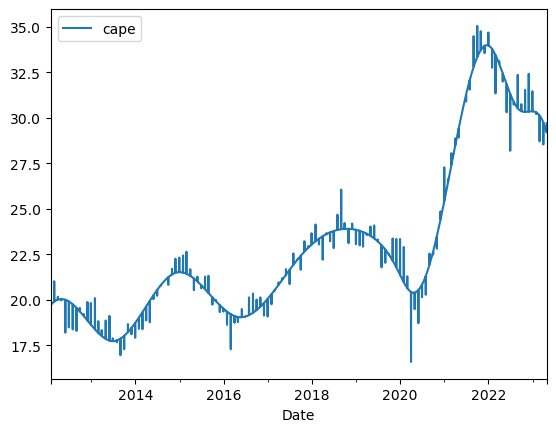

In [114]:

df_cape_d = df_cape.resample('D').interpolate(method='spline', order=3)
df_cape_d.plot()

<Axes: xlabel='observation_date'>

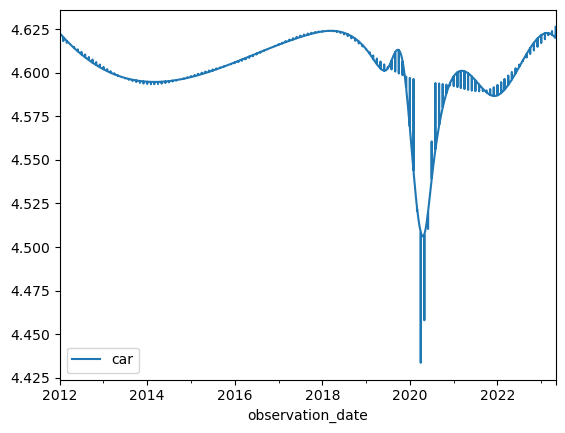

In [116]:

df_carsales_d = np.log(df_carsales.resample('D').interpolate(method='spline', order=3))
df_carsales_d.plot()

<Axes: xlabel='DATE'>

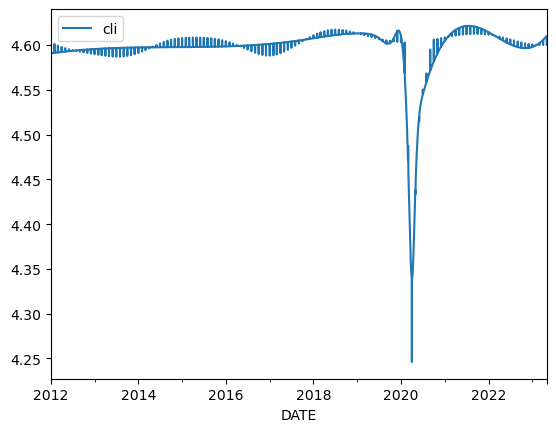

In [118]:

df_cli_d = np.log(df_cli.resample('D').interpolate(method='spline', order=3))
df_cli_d.plot()

<Axes: xlabel='DATE'>

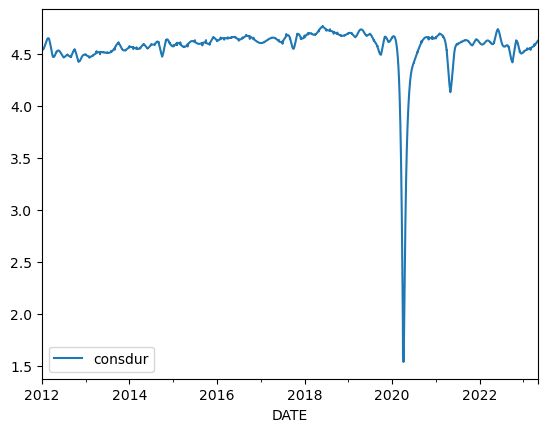

In [120]:

df_consdur_d = np.log(df_consdur.resample('D').interpolate(method='spline', order=3))
df_consdur_d.plot()

<Axes: xlabel='DATE'>

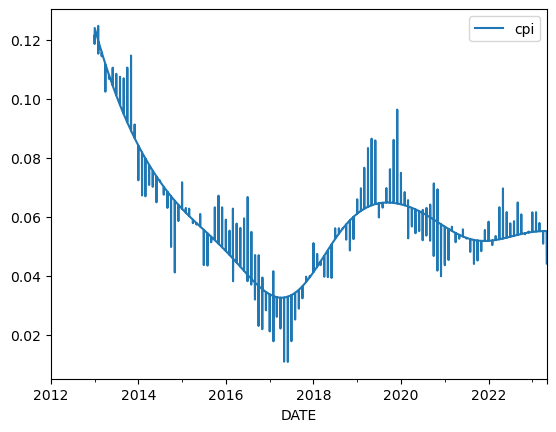

In [123]:

df_cpi_d = df_cpi.resample('D').interpolate(method='spline', order=3).pct_change(periods=365)
df_cpi_d.plot()

<Axes: xlabel='DATE'>

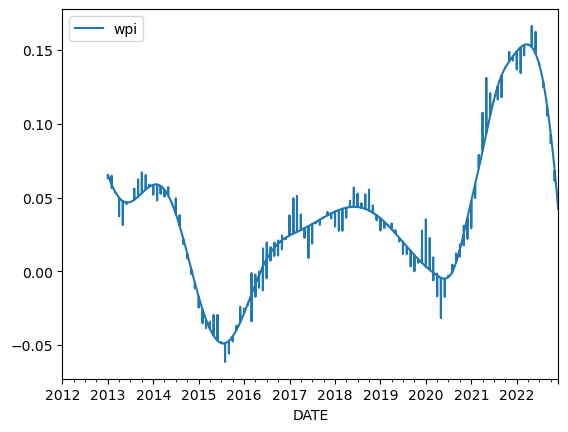

In [166]:

df_wpi_d = df_wpi.resample('D').interpolate(method='spline', order=3).pct_change(periods=365)
df_wpi_d.plot()

<Axes: xlabel='Month'>

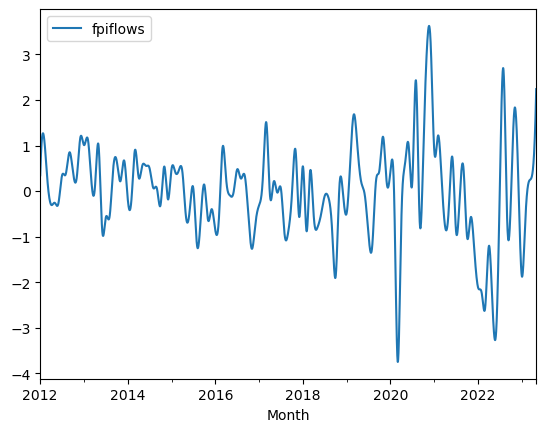

In [158]:
# Taking zscore for fpiflows
df_fpiflows_d = df_fpiflows.resample('D').interpolate(method='spline', order=3)
df_fpiflows_zscores = df_fpiflows_d.apply(zscore)
df_fpiflows_zscores.plot()


<Axes: xlabel='DATE'>

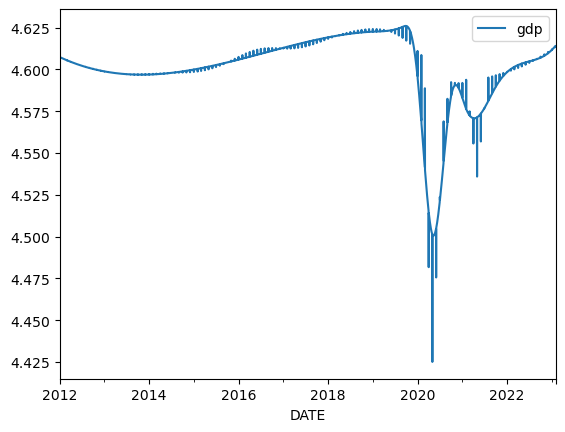

In [162]:
# Resampling to weekly 
df_gdp_d = np.log(df_gdp.resample('D').interpolate(method='spline', order=3))

df_gdp_d.plot()

<Axes: xlabel='DATE'>

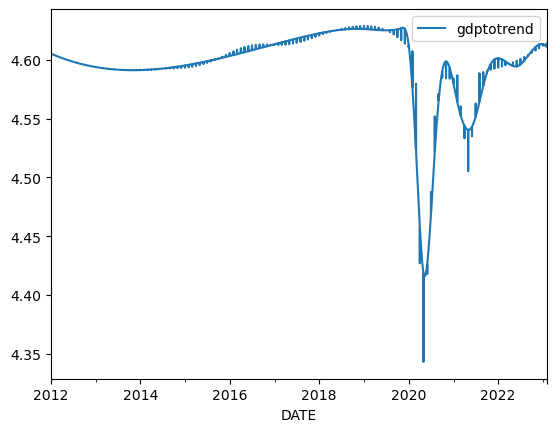

In [164]:

df_gdptotrend_d = np.log(df_gdptotrend.resample('D').interpolate(method='spline', order=3))
df_gdptotrend_d.plot()

<Axes: xlabel='DATE'>

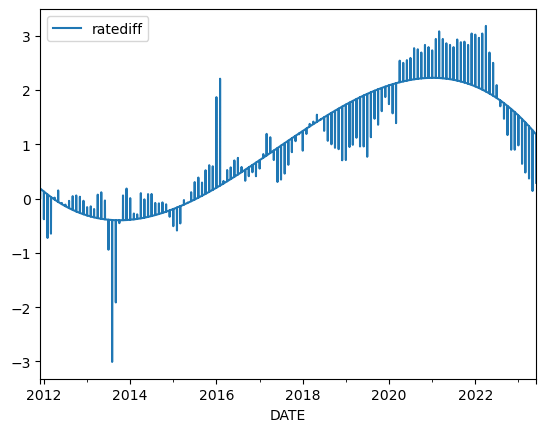

In [167]:

df_term_d = df_ratediff.resample('D').interpolate(method='spline', order=3)
df_term_d.plot()

<Axes: xlabel='DATE'>

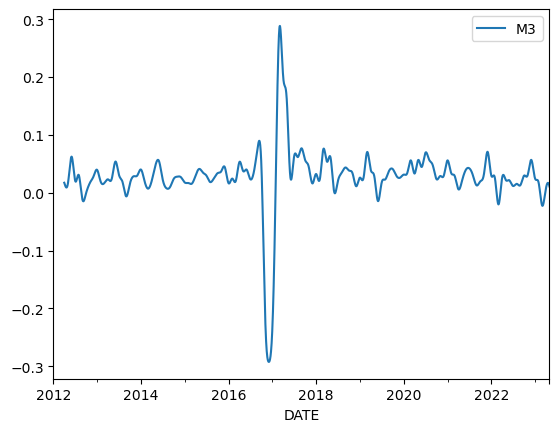

In [185]:

df_moneysupply_d = (df_moneysupply.resample('D').interpolate(method='spline', order=3)).pct_change(90)
df_moneysupply_d.plot()
#df_moneysupply['2016-01-01':'2018-01-01'].plot()

<Axes: xlabel='DATE'>

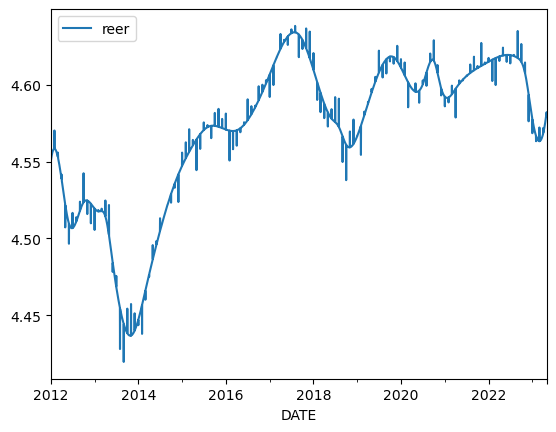

In [187]:

df_reer_d = np.log(df_reer.resample('D').interpolate(method='spline', order=3))
df_reer_d.plot()

<Axes: xlabel='Date'>

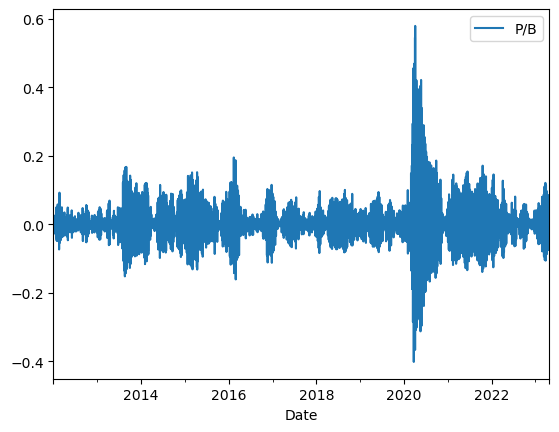

In [195]:

df_rel_val_d = df_rel_val.resample('D').interpolate(method='spline', order=3)

df_PB_d = pd.DataFrame()
df_PB_d['P/B'] = df_rel_val_d['P/B'].pct_change()
df_PB_d.plot()

<Axes: xlabel='Date\xa0'>

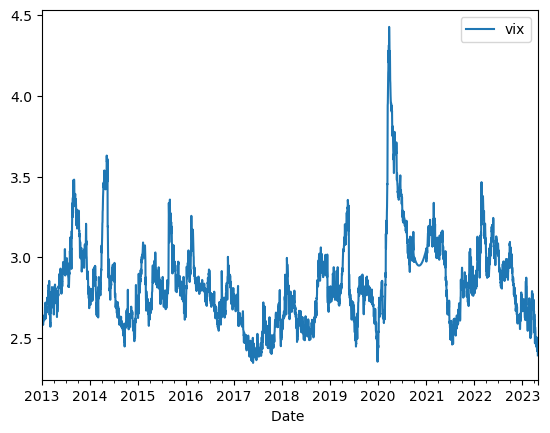

In [194]:

df_vix_d = np.log(df_vix.resample('D').interpolate(method='spline', order=3))
df_vix_d.plot()

<Axes: xlabel='DATE'>

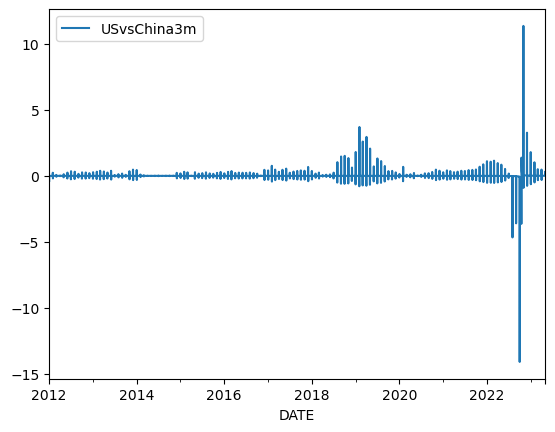

In [197]:

df_USvsChina_rate_d = df_USvsChina_rate.resample('D').interpolate(method='spline', order=3).pct_change()
df_USvsChina_rate_d.plot()

### Combining predictors into a single dataframe

In [89]:
%who DataFrame

Nifty_Weekly	 df_China3mrate	 df_PB_w	 df_US3mrate	 df_USvsChina_rate	 df_USvsChina_rate_w	 df_cape	 df_cape_w	 df_carsales	 
df_cli	 df_cli_w	 df_consdur	 df_consdur_w	 df_cpi	 df_exrate	 df_fpiflows	 df_fpiflows_w	 df_gdp	 
df_gdptotrend	 df_gdptotrend_w	 df_invgoods	 df_invgoods_w	 df_ltrate	 df_moneysupply	 df_moneysupply_w	 df_nifty	 df_ratediff	 
df_ratediff_w	 df_reer	 df_reer_w	 df_rel_val	 df_rel_val_w	 df_strate	 df_trade	 df_trade_w	 df_vix	 
df_wpi	 df_wpi_w	 


In [373]:
factors = [df_trade_d,df_gdptotrend_d, df_consdur_d,df_carsales_d,df_reer_d, df_moneysupply_d, df_cli_d,df_cpi_d, df_wpi_d, df_term_d, df_PB_d, df_cape_d, df_vix_d, df_fpiflows_zscores, df_USvsChina_rate_d ]

In [374]:
combined = pd.concat(factors,axis=1)

In [375]:
combined = combined[start:end]
combined

,EX/IM,gdptotrend,consdur,car,reer,M3,cli,cpi,wpi,ratediff,P/B,cape,vix,fpiflows,USvsChina3m
2012-12-31,4.047894,4.593765,4.492823,4.602050,4.519545,0.039306,4.595564,0.121422,0.065259,-0.309738,0.020803,18.607885,NaN,1.011045,0.000113
2013-01-01,4.049852,4.593734,4.497609,4.603355,4.505571,0.038967,4.589813,0.118602,0.062905,-0.157500,0.009585,18.599973,2.616666,1.009057,-0.217771
2013-01-02,4.049675,4.593728,4.491835,4.601977,4.519359,0.038567,4.595580,0.124019,0.065310,-0.311079,0.006329,18.592073,2.618125,1.008850,0.278683
2013-01-03,4.050842,4.593710,4.491291,4.601940,4.519269,0.038109,4.595588,0.123871,0.065062,-0.311746,0.003145,18.584186,2.600465,1.010240,0.000110
2013-01-04,4.052184,4.593692,4.490718,4.601904,4.519180,0.037599,4.595596,0.123723,0.064816,-0.312410,0.000000,18.576312,2.593013,1.013122,0.000109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,4.227597,4.613284,4.515687,4.621366,4.579680,0.027576,4.597728,0.054863,NaN,1.539030,-0.002347,30.362928,2.734043,-1.764996,0.014527
2022-12-29,4.230108,4.613263,4.516892,4.621417,4.579197,0.026669,4.597771,0.054868,NaN,1.536982,0.004706,30.362708,2.695471,-1.799237,0.014345
2022-12-30,4.232376,4.613238,4.518101,4.621467,4.578719,0.025850,4.597814,0.054874,NaN,1.534931,-0.004684,31.470000,2.699178,-1.827698,0.014168
2022-12-31,4.234382,4.613211,4.519302,4.621517,4.578247,0.025126,4.597859,0.054880,NaN,1.532876,0.024831,30.362053,2.690536,-1.850117,0.013995


### Correlation Analysis

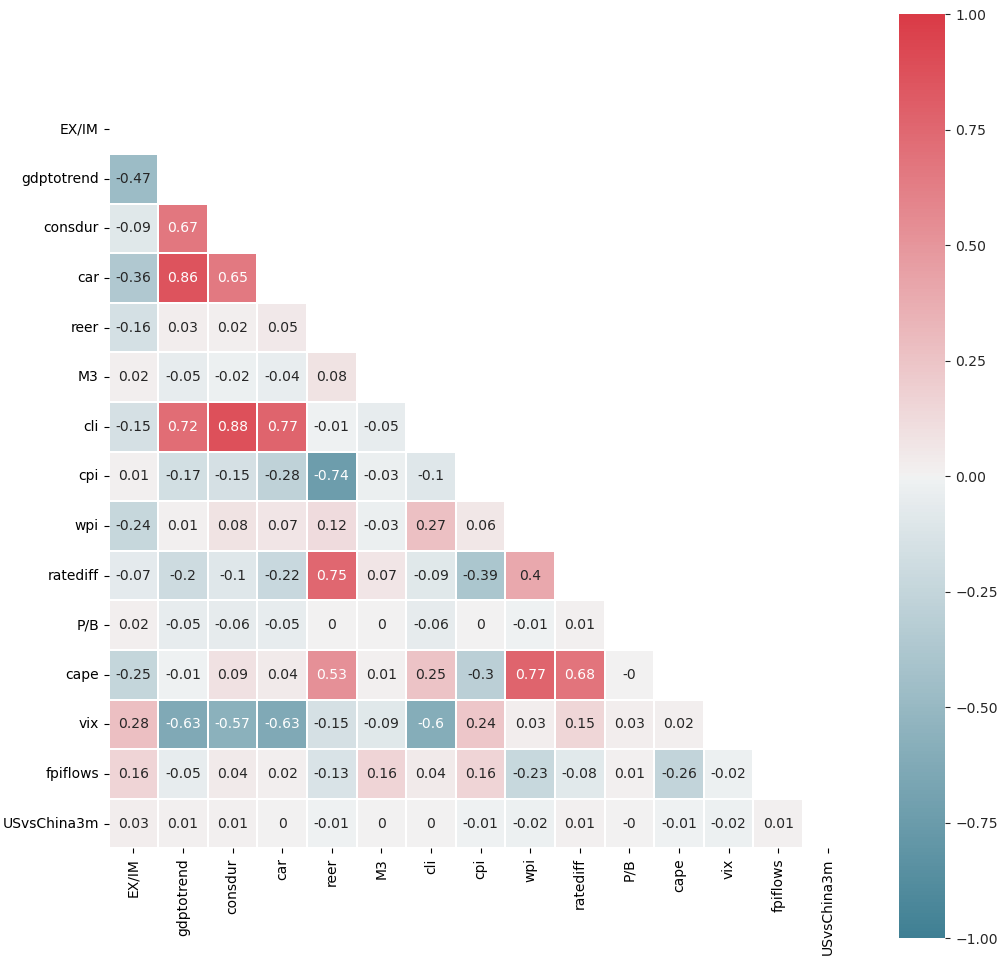

In [376]:
factor_corr = combined.corr().round(2)
cm = sns.diverging_palette(220,10,as_cmap=True)
s = factor_corr.style.background_gradient(cmap=cm,high=1,low=-1)
f, ax = plt.subplots(figsize = (12,12))
mask = np.zeros_like(factor_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(factor_corr,cmap=cm, mask=mask, vmin=-1, vmax=1, square=True,annot=True, linewidths=.2)

### Getting future returns

In [377]:
def getFutureReturn(nweeks,colname):
    
    r = df_nifty_daily.pct_change(nweeks*7)
    r.columns = [colname]
    return r


r1 = getFutureReturn(1,'R_1W') # 1 week forward returns
r2 = getFutureReturn(2,'R_2W') # 2 week forward returns
r3 = getFutureReturn(4,'R_4W') # 4 week forward returns
r4 = getFutureReturn(13,'R_1Q')# 1 quarter forward returns

futRet = pd.concat([r1,r2,r3,r4],axis=1)
futRet = futRet.loc[start:end]
#futRet.to_csv('linear forecasting\data\FutureReturn.csv')
futRet.isnull().sum()

R_1W    0
R_2W    0
R_4W    0
R_1Q    0
dtype: int64

In [378]:
df_all = pd.concat([combined,futRet],axis=1)
df_all['wpi'] = df_all['wpi'].ffill()
df_all['vix'] = df_all['vix'].bfill()
df_all[start:end].isnull().sum()

EX/IM          0
gdptotrend     0
consdur        0
car            0
reer           0
M3             0
cli            0
cpi            0
wpi            0
ratediff       0
P/B            0
cape           0
vix            0
fpiflows       0
USvsChina3m    0
R_1W           0
R_2W           0
R_4W           0
R_1Q           0
dtype: int64

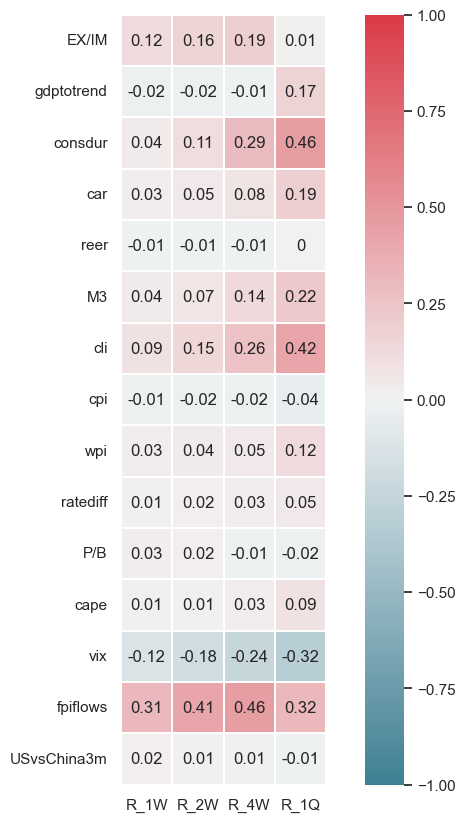

In [613]:
# Calculating the correlation of the factors with respect to forward returns
all_corr = df_all.corr().round(2)
ret_corr = all_corr[['R_1W','R_2W','R_4W','R_1Q']]
ret_corr = ret_corr.drop(['R_1W','R_2W','R_4W','R_1Q'])
ret_corr
f, ax = plt.subplots(figsize = (10, 10))
with sns.axes_style("white"):
     ax = sns.heatmap(ret_corr,cmap=cm, vmin=-1, vmax=1, square=True,annot=True, linewidths=.2)

### Splitting the data into training and testing segments

In [380]:
df_all

,EX/IM,gdptotrend,consdur,car,reer,M3,cli,cpi,wpi,ratediff,P/B,cape,vix,fpiflows,USvsChina3m,R_1W,R_2W,R_4W,R_1Q
2012-12-31,4.047894,4.593765,4.492823,4.602050,4.519545,0.039306,4.595564,0.121422,0.065259,-0.309738,0.020803,18.607885,2.616666,1.011045,0.000113,0.008428,0.008433,0.006184,0.034123
2013-01-01,4.049852,4.593734,4.497609,4.603355,4.505571,0.038967,4.589813,0.118602,0.062905,-0.157500,0.009585,18.599973,2.616666,1.009057,-0.217771,0.016242,0.009536,0.010830,0.042136
2013-01-02,4.049675,4.593728,4.491835,4.601977,4.519359,0.038567,4.595580,0.124019,0.065310,-0.311079,0.006329,18.592073,2.618125,1.008850,0.278683,0.014845,0.011108,0.016095,0.047285
2013-01-03,4.050842,4.593710,4.491291,4.601940,4.519269,0.038109,4.595588,0.123871,0.065062,-0.311746,0.003145,18.584186,2.600465,1.010240,0.000110,0.023740,0.016109,0.013622,0.039889
2013-01-04,4.052184,4.593692,4.490718,4.601904,4.519180,0.037599,4.595596,0.123723,0.064816,-0.312410,0.000000,18.576312,2.593013,1.013122,0.000109,0.018247,0.029185,0.018784,0.048408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,4.227597,4.613284,4.515687,4.621366,4.579680,0.027576,4.597728,0.054863,0.049546,1.539030,-0.002347,30.362928,2.734043,-1.764996,0.014527,-0.004209,-0.028821,-0.033898,0.076498
2022-12-29,4.230108,4.613263,4.516892,4.621417,4.579197,0.026669,4.597771,0.054868,0.049546,1.536982,0.004706,30.362708,2.695471,-1.799237,0.014345,0.003512,-0.012158,-0.033037,0.083171
2022-12-30,4.232376,4.613238,4.518101,4.621467,4.578719,0.025850,4.597814,0.054874,0.049546,1.534931,-0.004684,31.470000,2.699178,-1.827698,0.014168,0.016762,-0.008963,-0.031600,0.060646
2022-12-31,4.234382,4.613211,4.519302,4.621517,4.578247,0.025126,4.597859,0.054880,0.049546,1.532876,0.024831,30.362053,2.690536,-1.850117,0.013995,0.016762,-0.008963,-0.031600,0.060646


In [381]:
train_size = int(0.8*len(df_all))
train_data = df_all[:train_size]
test_data = df_all[train_size:]
train_data

,EX/IM,gdptotrend,consdur,car,reer,M3,cli,cpi,wpi,ratediff,P/B,cape,vix,fpiflows,USvsChina3m,R_1W,R_2W,R_4W,R_1Q
2012-12-31,4.047894,4.593765,4.492823,4.602050,4.519545,0.039306,4.595564,0.121422,0.065259,-0.309738,0.020803,18.607885,2.616666,1.011045,0.000113,0.008428,0.008433,0.006184,0.034123
2013-01-01,4.049852,4.593734,4.497609,4.603355,4.505571,0.038967,4.589813,0.118602,0.062905,-0.157500,0.009585,18.599973,2.616666,1.009057,-0.217771,0.016242,0.009536,0.010830,0.042136
2013-01-02,4.049675,4.593728,4.491835,4.601977,4.519359,0.038567,4.595580,0.124019,0.065310,-0.311079,0.006329,18.592073,2.618125,1.008850,0.278683,0.014845,0.011108,0.016095,0.047285
2013-01-03,4.050842,4.593710,4.491291,4.601940,4.519269,0.038109,4.595588,0.123871,0.065062,-0.311746,0.003145,18.584186,2.600465,1.010240,0.000110,0.023740,0.016109,0.013622,0.039889
2013-01-04,4.052184,4.593692,4.490718,4.601904,4.519180,0.037599,4.595596,0.123723,0.064816,-0.312410,0.000000,18.576312,2.593013,1.013122,0.000109,0.018247,0.029185,0.018784,0.048408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.161261,4.582109,4.656474,4.597442,4.592780,0.054624,4.603847,0.056806,0.046171,2.223930,0.000148,25.277746,3.035378,1.118354,-0.000436,-0.000821,0.017640,0.060397,0.247217
2020-12-28,4.162237,4.581624,4.657308,4.597550,4.592670,0.055095,4.604041,0.056781,0.046536,2.223951,0.044765,25.310550,3.038497,1.056418,-0.000438,0.040874,0.023459,0.069958,0.238589
2020-12-29,4.163275,4.581136,4.658188,4.597657,4.592565,0.055470,4.604233,0.056755,0.046900,2.223971,0.002545,25.343397,3.041657,0.999544,-0.000440,0.034627,0.027108,0.063054,0.244463
2020-12-30,4.164368,4.580646,4.659114,4.597761,4.592465,0.055742,4.604424,0.056729,0.047264,2.223988,0.005076,25.376287,3.044857,0.948109,-0.000443,0.028003,0.022094,0.066439,0.246081


In [382]:
y_train = train_data['R_1W']
x_train = train_data.drop(columns=['R_1W','R_2W','R_4W','R_1Q'])

y_test = test_data['R_1W']
x_test = test_data.drop(columns=['R_1W','R_2W','R_4W','R_1Q'])

### Fitting the regression model

In [383]:
Linreg = LinearRegression()
Linreg.fit(x_train, y_train)

LinearRegression()

In [384]:
y_pred = Linreg.predict(x_test)

In [391]:
mse_pred = mean_squared_error(y_test, y_pred)
r2_pred = r2_score(y_test,y_pred)
print(f'Mean Squared Error of prediction: {mse_pred}')
print(f'R-squared (R2) of prediction: {r2_pred}')

Mean Squared Error of prediction: 0.000624841261358508
R-squared (R2) of prediction: -0.27366382553855195


In [386]:
coefficients = Linreg.coef_
intercept = Linreg.intercept_

### Considering only those factors who have a correlation > 0.1 or <-0.1 with R_1Q

In [403]:
imp_factors = ret_corr[(ret_corr['R_1Q']> 0.1) | (ret_corr['R_1Q']<-0.1)]
imp_factors

,R_1W,R_2W,R_4W,R_1Q
gdptotrend,-0.02,-0.02,-0.01,0.17
consdur,0.04,0.11,0.29,0.46
car,0.03,0.05,0.08,0.19
M3,0.04,0.07,0.14,0.22
cli,0.09,0.15,0.26,0.42
wpi,0.03,0.04,0.05,0.12
vix,-0.12,-0.18,-0.24,-0.32
fpiflows,0.31,0.41,0.46,0.32


In [404]:
imp_fac = imp_factors.index.tolist()
df_reduced = df_all[imp_fac]
df_reduced

,gdptotrend,consdur,car,M3,cli,wpi,vix,fpiflows
2012-12-31,4.593765,4.492823,4.602050,0.039306,4.595564,0.065259,2.616666,1.011045
2013-01-01,4.593734,4.497609,4.603355,0.038967,4.589813,0.062905,2.616666,1.009057
2013-01-02,4.593728,4.491835,4.601977,0.038567,4.595580,0.065310,2.618125,1.008850
2013-01-03,4.593710,4.491291,4.601940,0.038109,4.595588,0.065062,2.600465,1.010240
2013-01-04,4.593692,4.490718,4.601904,0.037599,4.595596,0.064816,2.593013,1.013122
...,...,...,...,...,...,...,...,...
2022-12-28,4.613284,4.515687,4.621366,0.027576,4.597728,0.049546,2.734043,-1.764996
2022-12-29,4.613263,4.516892,4.621417,0.026669,4.597771,0.049546,2.695471,-1.799237
2022-12-30,4.613238,4.518101,4.621467,0.025850,4.597814,0.049546,2.699178,-1.827698
2022-12-31,4.613211,4.519302,4.621517,0.025126,4.597859,0.049546,2.690536,-1.850117


In [405]:

train_size2 = int(0.8*len(df_reduced))
train_data2 = df_reduced[:train_size2]
test_data2 = df_reduced[train_size2:]

x_train2 = train_data2
x_test2 = test_data2

Linreg2 = LinearRegression()
Linreg2.fit(x_train2, y_train)

y_pred2 = Linreg2.predict(x_test2)



In [406]:
mse_pred2 = mean_squared_error(y_test, y_pred2)
r2_pred2 = r2_score(y_test,y_pred2)
print(f'Mean Squared Error of prediction: {mse_pred2}')
print(f'R-squared (R2) of prediction: {r2_pred2}')

Mean Squared Error of prediction: 0.0005393313092928646
R-squared (R2) of prediction: -0.09936206378748724


In [407]:
coefficients2 = Linreg2.coef_
intercept2 = Linreg2.intercept_
coefficients2


array([-0.22489943, -0.02971177,  0.03560208, -0.00984902,  0.33550134,
       -0.00305659, -0.02018416,  0.00786179])

In [408]:
x = sm.add_constant(x_train2)
model = sm.OLS(y_train,x_train2 ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   R_1W   R-squared (uncentered):                   0.173
Model:                            OLS   Adj. R-squared (uncentered):              0.171
Method:                 Least Squares   F-statistic:                              76.30
Date:                Wed, 06 Sep 2023   Prob (F-statistic):                   1.22e-114
Time:                        22:38:51   Log-Likelihood:                          7056.2
No. Observations:                2923   AIC:                                 -1.410e+04
Df Residuals:                    2915   BIC:                                 -1.405e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gdptotrend    -0.1979      0.027     -7.409      0.000      -0.250      -0.145
consdur       -0.0220      0.003     -7.007      0.000      -0.028      -0.016
car           -0.0191      0.042     -0.460      0.646      -0.101       0.062
M3            -0.0133      0.007     -1.978      0.048      -0.027      -0.000
cli            0.2538      0.039      6.569      0.000       0.178       0.330
wpi            0.0060      0.014      0.435      0.664      -0.021       0.033
vix           -0.0230      0.002    -12.168      0.000      -0.027      -0.019
fpiflows       0.0082      0.001     15.717      0.000       0.007       0.009
==============================================================================
Omnibus:                      242.793   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1399.948
Skew:                           0.119   Prob(JB):                    1.01e-304
Kurtosis:                       6.382   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [614]:
y_predicted = model.predict(x_test2)
residuals = y_test - y_predicted
mse = np.mean(residuals**2)

y_mean = np.mean(y_test)
tss = np.sum((y_test - y_mean)**2)

rsquared = 1 - mse/tss
rsquared

N = len(y_test)
p = len(model.params)

adj_rsquared = 1 - (1-rsquared)*(N-1)/(N-p-1)
adj_rsquared

0.9985486107466874

### Setting up a strategy based on the model

In [422]:
x = df_reduced
x

,gdptotrend,consdur,car,M3,cli,wpi,vix,fpiflows
2012-12-31,4.593765,4.492823,4.602050,0.039306,4.595564,0.065259,2.616666,1.011045
2013-01-01,4.593734,4.497609,4.603355,0.038967,4.589813,0.062905,2.616666,1.009057
2013-01-02,4.593728,4.491835,4.601977,0.038567,4.595580,0.065310,2.618125,1.008850
2013-01-03,4.593710,4.491291,4.601940,0.038109,4.595588,0.065062,2.600465,1.010240
2013-01-04,4.593692,4.490718,4.601904,0.037599,4.595596,0.064816,2.593013,1.013122
...,...,...,...,...,...,...,...,...
2022-12-28,4.613284,4.515687,4.621366,0.027576,4.597728,0.049546,2.734043,-1.764996
2022-12-29,4.613263,4.516892,4.621417,0.026669,4.597771,0.049546,2.695471,-1.799237
2022-12-30,4.613238,4.518101,4.621467,0.025850,4.597814,0.049546,2.699178,-1.827698
2022-12-31,4.613211,4.519302,4.621517,0.025126,4.597859,0.049546,2.690536,-1.850117


In [484]:
y = pd.DataFrame(df_all['R_1W'])
y

,R_1W
Date,
2012-12-31,0.008428
2013-01-01,0.016242
2013-01-02,0.014845
2013-01-03,0.023740
2013-01-04,0.018247
...,...
2022-12-28,-0.004209
2022-12-29,0.003512
2022-12-30,0.016762


<Axes: xlabel='Date'>

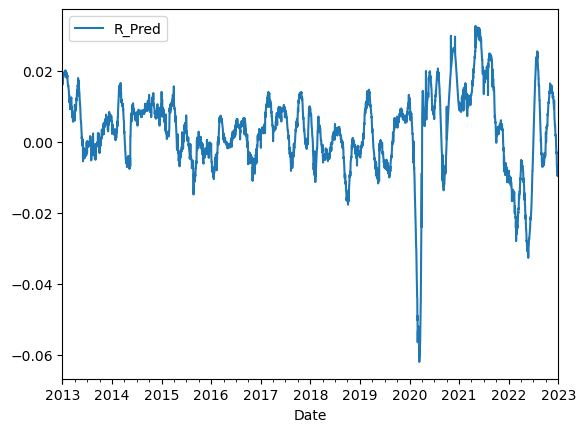

In [485]:
y_pred = pd.DataFrame()
y_pred['R_Pred'] = Linreg2.predict(x)
y_pred = y_pred.set_index(y.index)
y_pred.plot()

In [544]:
data = pd.concat([y,y_pred],axis=1)
#data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)
data



,R_1W,R_Pred
Date,,
2012-12-31,0.008428,0.018076
2013-01-01,0.016242,0.016053
2013-01-02,0.014845,0.018077
2013-01-03,0.023740,0.018471
2013-01-04,0.018247,0.018673
...,...,...
2022-12-28,-0.004209,-0.009610
2022-12-29,0.003512,-0.009106
2022-12-30,0.016762,-0.009411


In [546]:
data.index[0]

Timestamp('2012-12-31 00:00:00', freq='D')

In [641]:
# Cash return is not considered
# Short positions and leverage as well as transaction costs are not considered

pf_value_BH = 1
pf_value_MT = 1


Date = data.index[0]


pf_BH = [{'Date':Date,'Buy and Hold': pf_value_BH }]
pf_MT = [{'Date':Date,'Market Timing': pf_value_MT }]

for i in range(len(data)): 
    while Date<=data.index[-1]:
        
        Date += timedelta(days=7)
        
        pf_value_BH *= (1+data['R_1W'].iloc[i])
    
        pf_BH.append({'Date': Date, 'Buy and Hold': pf_value_BH})
    
        if data['R_Pred'].iloc[i] > 0:   # stay invested only if predicted future 1 week return is greater than zero     
            pf_value_MT *= (1+data['R_1W'].iloc[i])
            

        pf_MT.append({'Date': Date, 'Market Timing': pf_value_MT}) 
    
        
        
        i+= 7
        
pf_MT = pd.DataFrame(pf_MT)
pf_BH = pd.DataFrame(pf_BH)

pf_combined = pd.concat([pf_BH, pf_MT], axis=1)
pf_combined
    
   
        

,Date,Buy and Hold,Date,Market Timing
0,2012-12-31,1.000000,2012-12-31,1.000000
1,2013-01-07,1.008428,2013-01-07,1.008428
2,2013-01-14,1.022656,2013-01-14,1.022656
3,2013-01-21,1.028744,2013-01-21,1.028744
4,2013-01-28,1.038739,2013-01-28,1.038739
...,...,...,...,...
518,2022-12-05,3.585237,2022-12-05,9.392897
519,2022-12-12,3.611941,2022-12-12,9.462858
520,2022-12-19,3.572567,2022-12-19,9.359702
521,2022-12-26,3.557752,2022-12-26,9.359702


In [642]:
back_test = pd.DataFrame()

back_test['Buy and Hold']= pf_combined['Buy and Hold']
back_test['Market Timing']= pf_combined['Market Timing']
back_test.set_index(pf_combined.iloc[:,0], inplace=True)
back_test

,Buy and Hold,Market Timing
Date,,
2012-12-31,1.000000,1.000000
2013-01-07,1.008428,1.008428
2013-01-14,1.022656,1.022656
2013-01-21,1.028744,1.028744
2013-01-28,1.038739,1.038739
...,...,...
2022-12-05,3.585237,9.392897
2022-12-12,3.611941,9.462858
2022-12-19,3.572567,9.359702


In [679]:
back_test.to_csv('back_test.csv')

Text(0.5, 1.0, 'Market Timing vs Buy and Hold')

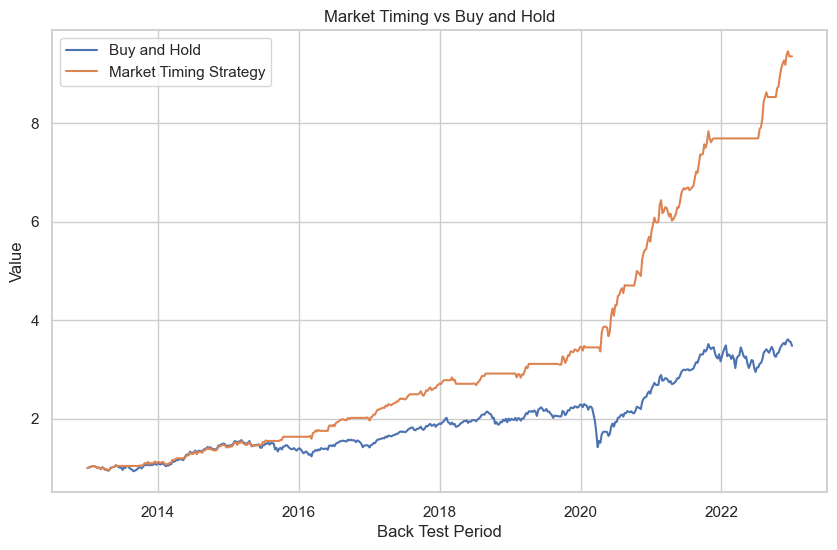

In [643]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.lineplot(data=back_test, x='Date', y='Buy and Hold', label='Buy and Hold')
sns.lineplot(data=back_test, x='Date', y='Market Timing', label='Market Timing Strategy')

plt.xlabel('Back Test Period')
plt.ylabel('Value')
plt.title('Market Timing vs Buy and Hold')

In [644]:
# Calculating CAGR
initial_BH = back_test.iloc[0]['Buy and Hold']
final_BH = back_test.iloc[-1]['Buy and Hold']
CAGR_BH = (final_BH/initial_BH)**(1/10)-1
round(CAGR_BH*100,2)

initial_MT = back_test.iloc[0]['Market Timing']
final_MT = back_test.iloc[-1]['Market Timing']
CAGR_MT = (final_MT/initial_MT)**(1/10)-1
round(CAGR_MT*100,2)

print("The CAGR of the Buy and Hold strategy is ", round(CAGR_BH*100,2),"%")
print("The CAGR of the Market Timing strategy is ", round(CAGR_MT*100,2),"%")

The CAGR of the Buy and Hold strategy is  13.28 %
The CAGR of the Market Timing strategy is  25.06 %


In [682]:
returns_BH = back_test['Buy and Hold'].pct_change()
mean_return_BH = (1+returns_BH.mean())**52-1
risk_free_rate = 0.03 
ann_std_BH = returns_BH.std() * np.sqrt(52)  
sharpe_ratio_BH = (mean_return_BH - risk_free_rate) / ann_std_BH
sharpe_ratio_BH

returns_MT = back_test['Market Timing'].pct_change()
mean_return_MT = (1+returns_MT.mean())**52-1
risk_free_rate = 0.05        #Assuming a risk free rate of 5, normall could take the timeseries of 14 day t-bi
ann_std_MT = returns_MT.std() * np.sqrt(52)  
sharpe_ratio_MT = (mean_return_MT - risk_free_rate) / ann_std_MT
sharpe_ratio_MT

print("The Sharpe Ratio of the Buy and Hold strategy is ", round(sharpe_ratio_BH,2))
print("The Sharpe Ratio of the Market Timing strategy is ", round(sharpe_ratio_MT,2))

The Sharpe Ratio of the Buy and Hold strategy is  0.68
The Sharpe Ratio of the Market Timing strategy is  1.74


In [685]:
ann_std_BH = returns_BH.std() * np.sqrt(52)
ann_std_BH

0.17865400966337278

In [686]:
ann_std_MT = returns_MT.std() * np.sqrt(52)  
ann_std_MT

0.11955620745842817

In [655]:
back_test['Previous_Peak_BH'] = back_test['Buy and Hold'].cummax()
back_test['Drawdown_BH'] = (back_test['Buy and Hold'] - back_test['Previous_Peak_BH']) / back_test['Previous_Peak_BH']
max_drawdown_BH = back_test['Drawdown_BH'].min()
max_drawdown_BH


back_test['Previous_Peak_MT'] = back_test['Market Timing'].cummax()
back_test['Drawdown_MT'] = (back_test['Market Timing'] - back_test['Previous_Peak_MT']) / back_test['Previous_Peak_MT']
max_drawdown_MT = back_test['Drawdown_MT'].min()
max_drawdown_MT

print("The Max Drawdown of the Buy and Hold strategy is ", round(max_drawdown_BH*100,2),"%")
print("The Max Drawdown of the Market Timing strategy is ", round(max_drawdown_MT*100,2),"%")

The Max Drawdown of the Buy and Hold strategy is  -38.1 %
The Max Drawdown of the Market Timing strategy is  -8.75 %


In [678]:
back_test_results = pd.DataFrame(columns=['Strategy', 'Start Date', 'End Date', 'CAGR for the period', 'Sharpe Ratio', 'Max Drawdown'])
#back_test_results.columns = ['Strategy', 'Start Date', 'End Date', 'CAGR for the period', 'Sharpe Ratio', 'Max Drawdown']
back_test_results.loc[0] = [back_test.columns[0],back_test.index[0].date(),back_test.index[-1].date(),round(CAGR_BH*100,2), round(sharpe_ratio_BH,2),round(max_drawdown_BH*100,2)]
back_test_results.loc[1] = [back_test.columns[1],back_test.index[0].date(),back_test.index[-1].date(),round(CAGR_MT*100,2), round(sharpe_ratio_MT,2),round(max_drawdown_MT*100,2)]
back_test_results

,Strategy,Start Date,End Date,CAGR for the period,Sharpe Ratio,Max Drawdown
0,Buy and Hold,2012-12-31,2023-01-02,13.28,0.68,-38.10
1,Market Timing,2012-12-31,2023-01-02,25.06,1.74,-8.75


In [680]:
back_test_results.to_csv('back_test_results.csv')